In [1]:
import cv2
import os
from darkflow_utils import *

In [2]:
tfnet = tfnet_load('yolo')

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


{'threshold': 0.1, 'model': 'cfg/yolo.cfg', 'load': 'bin/yolo.weights'}
Parsing ./cfg/yolo.cfg
Parsing cfg/yolo.cfg
Loading bin/yolo.weights ...
Successfully identified 203934260 bytes
Finished in 0.04448103904724121s
Model has a coco model name, loading coco labels.

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Ye

In [3]:
images = []
images_path = 'datasets/UCF11/separate_frames_50_h_240_w_320/train/basketball/v_shooting_01_01'
for image_filename in sorted(os.listdir(images_path)):
    image = cv2.imread(os.path.join(images_path, image_filename))
    images.append(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

images = np.array(images)
yolo_ucf = tfnet_predict(tfnet, images)
for box in get_boxes(tfnet, yolo_ucf, 240, 320):
    print(box)
    print()

(50, 608, 608, 3)
0 255
[{'label': 'person', 'confidence': 0.20647335, 'topleft': {'x': 99, 'y': 114}, 'bottomright': {'x': 106, 'y': 143}}, {'label': 'person', 'confidence': 0.65872926, 'topleft': {'x': 37, 'y': 110}, 'bottomright': {'x': 62, 'y': 173}}, {'label': 'person', 'confidence': 0.8038243, 'topleft': {'x': 200, 'y': 105}, 'bottomright': {'x': 234, 'y': 176}}, {'label': 'train', 'confidence': 0.13238752, 'topleft': {'x': 0, 'y': 1}, 'bottomright': {'x': 295, 'y': 68}}, {'label': 'sports ball', 'confidence': 0.3555903, 'topleft': {'x': 159, 'y': 85}, 'bottomright': {'x': 180, 'y': 105}}, {'label': 'stop sign', 'confidence': 0.1589925, 'topleft': {'x': 300, 'y': 92}, 'bottomright': {'x': 311, 'y': 104}}, {'label': 'bench', 'confidence': 0.20735598, 'topleft': {'x': 89, 'y': 124}, 'bottomright': {'x': 202, 'y': 144}}, {'label': 'bench', 'confidence': 0.16323943, 'topleft': {'x': 240, 'y': 119}, 'bottomright': {'x': 315, 'y': 140}}, {'label': 'handbag', 'confidence': 0.11777479, '

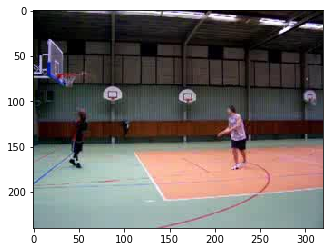

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.imshow(images[0])

In [4]:
rav = cv2.imread('../darkflow/ravaglia.jpg')
rav = cv2.cvtColor(rav, cv2.COLOR_BGR2RGB)
h, w, _ = rav.shape

yolo_out = tfnet_predict(tfnet, rav)

print(yolo_out.shape)

(1, 608, 608, 3)
0 255
(1, 19, 19, 425)


In [5]:
print('Using return_predict method...')
print(tfnet.return_predict(cv2.imread('../darkflow/ravaglia.jpg')))

Using return_predict method...
[{'label': 'person', 'confidence': 0.82654244, 'topleft': {'x': 227, 'y': 89}, 'bottomright': {'x': 545, 'y': 475}}, {'label': 'backpack', 'confidence': 0.44378474, 'topleft': {'x': 67, 'y': 352}, 'bottomright': {'x': 237, 'y': 449}}]


In [6]:
file_path = 'datasets/UCF11/separate_frames_50_h_240_w_320_yolo_padding_False/train/basketball/v_shooting_01_01.npy'
yolo_ucf = np.load(file_path)

for box in get_boxes(tfnet, yolo_ucf, 240, 320):
    print(box)
    print()

[{'label': 'person', 'confidence': 0.13392657, 'topleft': {'x': 296, 'y': 88}, 'bottomright': {'x': 313, 'y': 107}}, {'label': 'person', 'confidence': 0.17516941, 'topleft': {'x': 100, 'y': 116}, 'bottomright': {'x': 106, 'y': 140}}, {'label': 'person', 'confidence': 0.6010161, 'topleft': {'x': 37, 'y': 109}, 'bottomright': {'x': 61, 'y': 173}}, {'label': 'person', 'confidence': 0.814658, 'topleft': {'x': 200, 'y': 107}, 'bottomright': {'x': 234, 'y': 175}}, {'label': 'train', 'confidence': 0.1383017, 'topleft': {'x': 0, 'y': 0}, 'bottomright': {'x': 319, 'y': 71}}, {'label': 'stop sign', 'confidence': 0.15859461, 'topleft': {'x': 76, 'y': 82}, 'bottomright': {'x': 96, 'y': 101}}, {'label': 'stop sign', 'confidence': 0.2661834, 'topleft': {'x': 160, 'y': 85}, 'bottomright': {'x': 180, 'y': 105}}, {'label': 'stop sign', 'confidence': 0.13476984, 'topleft': {'x': 300, 'y': 93}, 'bottomright': {'x': 311, 'y': 104}}, {'label': 'bench', 'confidence': 0.3720362, 'topleft': {'x': 92, 'y': 125

[{'label': 'person', 'confidence': 0.16296335, 'topleft': {'x': 87, 'y': 116}, 'bottomright': {'x': 101, 'y': 147}}, {'label': 'person', 'confidence': 0.3581703, 'topleft': {'x': 100, 'y': 117}, 'bottomright': {'x': 107, 'y': 140}}, {'label': 'person', 'confidence': 0.7209699, 'topleft': {'x': 43, 'y': 112}, 'bottomright': {'x': 61, 'y': 172}}, {'label': 'person', 'confidence': 0.86894983, 'topleft': {'x': 201, 'y': 106}, 'bottomright': {'x': 233, 'y': 180}}, {'label': 'sports ball', 'confidence': 0.1364052, 'topleft': {'x': 167, 'y': 92}, 'bottomright': {'x': 178, 'y': 99}}, {'label': 'sports ball', 'confidence': 0.57372963, 'topleft': {'x': 159, 'y': 85}, 'bottomright': {'x': 181, 'y': 104}}, {'label': 'sports ball', 'confidence': 0.42781574, 'topleft': {'x': 168, 'y': 153}, 'bottomright': {'x': 178, 'y': 159}}]

[{'label': 'person', 'confidence': 0.19647571, 'topleft': {'x': 87, 'y': 117}, 'bottomright': {'x': 101, 'y': 146}}, {'label': 'person', 'confidence': 0.3449164, 'topleft': 

[{'label': 'person', 'confidence': 0.7868754, 'topleft': {'x': 47, 'y': 111}, 'bottomright': {'x': 66, 'y': 170}}, {'label': 'person', 'confidence': 0.11559181, 'topleft': {'x': 164, 'y': 135}, 'bottomright': {'x': 169, 'y': 147}}, {'label': 'person', 'confidence': 0.8018304, 'topleft': {'x': 209, 'y': 100}, 'bottomright': {'x': 241, 'y': 185}}, {'label': 'sports ball', 'confidence': 0.28035262, 'topleft': {'x': 160, 'y': 85}, 'bottomright': {'x': 179, 'y': 105}}, {'label': 'sports ball', 'confidence': 0.10182185, 'topleft': {'x': 166, 'y': 91}, 'bottomright': {'x': 177, 'y': 100}}, {'label': 'tennis racket', 'confidence': 0.118421264, 'topleft': {'x': 222, 'y': 151}, 'bottomright': {'x': 239, 'y': 185}}, {'label': 'tvmonitor', 'confidence': 0.15197599, 'topleft': {'x': 14, 'y': 31}, 'bottomright': {'x': 33, 'y': 80}}]

[{'label': 'person', 'confidence': 0.11471966, 'topleft': {'x': 100, 'y': 116}, 'bottomright': {'x': 106, 'y': 141}}, {'label': 'person', 'confidence': 0.78213346, 'top